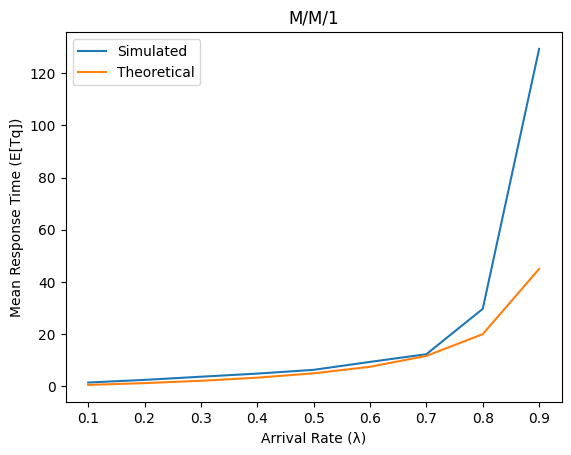

The average wait time is: [1.4751131221719458, 2.4813895781637716, 3.6972624798711755, 4.8919540229885055, 6.334408602150537, 9.377062706270626, 12.325598259608412, 29.696706028589187, 129.2789351851852]
The number of jobs that entered the system is: 1728
The total wait time is: 223394


In [ ]:
# 1. Code for M/M/1 Queue

import numpy as np
import matplotlib.pyplot as plt
import queue


# a class that represents a job
class job:
  def __init__(self,time_entered,process_time):
    # time it enters the system
    self.time_entered = time_entered
    # time it takes to be processed
    self.process_time = process_time

def poisson_arrival_times(total_rounds,lamda):
  arrival_intervals = np.random.exponential(scale=(1/lamda),size=total_rounds)
  arrival_times = [arrival_intervals[0]]
  for i in range(1, len(arrival_intervals)):
    arrival_times.append(arrival_intervals[i] + arrival_times[i - 1])
  return arrival_times

# max percentage is set to 1
max_percentage=1
# with step 0.1
step=0.1

total_rounds=10000
mu=1/5

# store the simulation results
results=[]

# loop to get the results
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  arrivals=poisson_arrival_times(total_rounds,lamda)
  arrival_time=arrivals.pop(0)

  job_waiting_list=[]
  server_busy=False # flag to track the server's status
  current_job=None

  total_waitime=0
  number_of_entered_jobs=0

  current_job_finish_time=-1

  #simulate arrival proccess
  for cur_time in range(0,total_rounds):

    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1

    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True


    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        # update num of jobs entered
        number_of_entered_jobs=number_of_entered_jobs+1
        # update total wait time
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True

    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        job_waiting_list.append(job(0,np.random.exponential(scale=int(1/mu))))

  # get final results
  results.append(total_waitime/number_of_entered_jobs)


# store theoretical results
thoretical_results=[]

# get the theoretical results
for percentage in np.arange(0.1, max_percentage, step):

  lamda=percentage*mu #jobs/sec
  rho=lamda/mu
  ET=rho/(mu-lamda)
  thoretical_results.append(ET)

# plot the simulated result and the theoretical one
plt.plot(list(np.arange(0.1, max_percentage, step)), results, label='Simulated')
plt.plot(list(np.arange(0.1, max_percentage, step)), thoretical_results, label='Theoretical')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Mean Response Time (E[Tq])')
plt.legend()
plt.title('M/M/1')
plt.show()

# print some results
print(f'The average wait time is: {(results)}')
print(f'The number of jobs that entered the system is: {(number_of_entered_jobs)}')
print(f'The total wait time is: {(total_waitime)}')

[13.890671111111113, 25.004010000000005, 39.29258857142858, 58.34402666666668, 85.01604, 125.02406, 191.70409333333345, 325.06416000000013, 725.1443600000002]


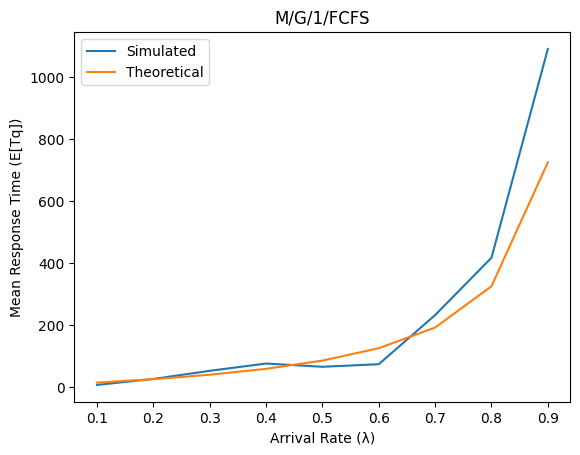

The average wait time is: [6.444444444444445, 25.682619647355164, 51.969018932874356, 75.55729794933654, 65.02994011976048, 73.30502283105022, 231.93539325842696, 417.21226698737223, 1091.2266009852217]
The number of jobs that entered the system is: 1421
The total wait time is: 1550633


In [ ]:
# 2. Code for M/G/1 FCFS Queue

import numpy as np
import matplotlib.pyplot as plt
import queue


# a class that represents a job
class job:
  def __init__(self,time_entered,process_time):
    self.time_entered = time_entered #counts time since entered the queue
    self.process_time = process_time #the time the proccess takes to run

#simulates poisson arrivals and returns an array with the arrival times
def poisson_arrival_times(total_rounds,lamda):
  arrival_intervals = np.random.exponential(scale=(1/lamda),size=total_rounds)
  arrival_times = [arrival_intervals[0]]
  for i in range(1, len(arrival_intervals)):
    arrival_times.append(arrival_intervals[i] + arrival_times[i - 1])
  return arrival_times


# max percentage is set to 1
max_percentage=1
# with step 0.1
step=0.1

#total time (sec)
total_rounds=10000
mu=1/5

#Tq results will be saved here
results=[]

#for rho in 0.1:0.9
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  #get job arrival times
  arrivals=poisson_arrival_times(total_rounds,lamda)
  #get first job arrival time
  arrival_time=arrivals.pop(0)

  #represents the queue
  job_waiting_list=[]
  server_busy=False
  #pointer to current job
  current_job=None
  #data for final statistics
  total_waitime=0
  number_of_entered_jobs=0
  #flag that is -1 when there is no job in the queue
  current_job_finish_time=-1
  #simulate arrival proccess
  for cur_time in range(0,total_rounds):
    #wait time counter for jobs waiting
    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1
    #check if there is a job finished
    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        #if no other job waiting set server to not busy
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          #take next job
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True

    #check if a job came and put it to the server
    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        number_of_entered_jobs=number_of_entered_jobs+1
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True
    #adds jobs to the queue when they arrive
    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        #creates a 1 sec job with probability 98% and a 201 job with probability 2%
        job_time=-1
        job_type=np.random.rand()
        if (job_type>0.02):
          job_time=1
        else:
          job_time=201
        job_waiting_list.append(job(0,job_time))

   # get final results
  results.append(total_waitime/number_of_entered_jobs)


# initialize list for theoretical results
thoretical_results=[]
# loop from 0.1 to 1 with step 0.1
for percentage in np.arange(0.1, max_percentage, step):
  #mu=5
  mu=(0.98 * 1 + 0.02 * 201)
  lamda=percentage*mu  #jobs/sec
  rho=lamda/mu
  ES = 0.98 * 1 + 0.02 * 201
  VarS = (0.98 * (1 - 0.98) * (1 - 0.98)) + (0.02 * (201 - 0.98) * (201 - 0.98))
  ET = ES + (rho * VarS) / (2 * (1 - rho) * ES)
  thoretical_results.append(ET)

print(thoretical_results)
# plot the simulated result and the theoretical one
plt.plot(list(np.arange(0.1, max_percentage, step)), results, label='Simulated')
plt.plot(list(np.arange(0.1, max_percentage, step)), thoretical_results, label='Theoretical')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Mean Response Time (E[Tq])')
plt.legend()
plt.title('M/G/1/FCFS')
plt.show()


# print some results
print(f'The average wait time is: {(results)}')
print(f'The number of jobs that entered the system is: {(number_of_entered_jobs)}')
print(f'The total wait time is: {(total_waitime)}')

[0.8976217777777779, 4.0392980000000005, 10.386766285714291, 21.542922666666666, 40.39298, 72.70736399999998, 131.9504013333334, 258.5150720000001, 654.3662760000001]


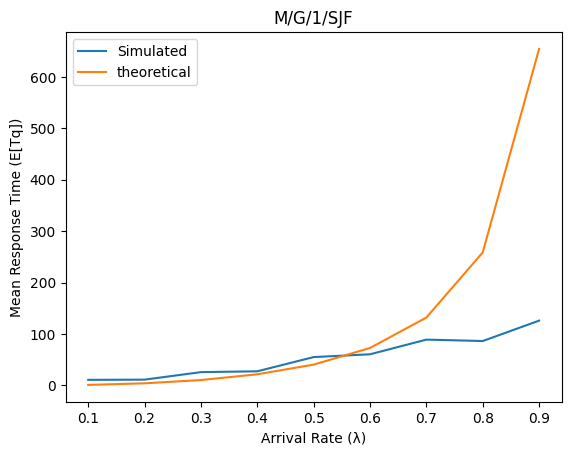

The average wait time is: [10.763546798029557, 11.17, 25.77946127946128, 27.384318766066837, 55.048449612403104, 60.4875, 89.00854700854701, 86.26190476190476, 125.92290119931468]
The number of jobs that entered the system is: 1751
The total wait time is: 220491


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import queue


# a class that represents a job
class job:
  def __init__(self,time_entered,process_time):
    self.time_entered = time_entered #counts time since entered the queue
    self.process_time = process_time #the time the proccess takes to run

#simulates poisson arrivals and returns an array with the arrival times
def poisson_arrival_times(total_rounds,lamda):
  arrival_intervals = np.random.exponential(scale=(1/lamda),size=total_rounds)
  arrival_times = [arrival_intervals[0]]
  for i in range(1, len(arrival_intervals)):
    arrival_times.append(arrival_intervals[i] + arrival_times[i - 1])
  return arrival_times


# max percentage is set to 1
max_percentage=1
# with step 0.1
step=0.1

#total time (sec)
total_rounds=10000
mu=1/5

#Tq results will be saved here
results=[]

#for rho in 0.1:0.9
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  #get job arrival times
  arrivals=poisson_arrival_times(total_rounds,lamda)
  #get first job arrival time
  arrival_time=arrivals.pop(0)

  #represents the queue
  job_waiting_list=[]
  server_busy=False
  #pointer to current job
  current_job=None
  #data for final statistics
  total_waitime=0
  number_of_entered_jobs=0
  #flag that is -1 when there is no job in the queue
  current_job_finish_time=-1
  #simulate arrival proccess
  for cur_time in range(0,total_rounds):
    #wait time counter for jobs waiting
    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1
    #check if there is a job finished
    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        #if no other job waiting set server to not busy
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          #take next job
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True

    #check if a job came and put it to the server
    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        number_of_entered_jobs=number_of_entered_jobs+1
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True
    #adds jobs to the queue when they arrive
    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        #creates a 1 sec job with probability 98% and a 201 job with probability 2%
        #put shortest job first and logest one last
        job_time=-1
        job_type=np.random.rand()
        if (job_type>0.02):
          job_time=1
          job_waiting_list.insert(0,job(0,job_time))
        else:
          job_time=201
          job_waiting_list.append(job(0,job_time))

  # get final results
  results.append(total_waitime/number_of_entered_jobs)


# initialize list for theoretical results
thoretical_results=[]
# loop from 0.1 to 1 with step 0.1
for rho in np.arange(0.1, max_percentage, step):

  ES = 0.98 * 1 + 0.02 * 201
  VarS = (0.98 * (1 - 0.98)**2) + (0.02 * (201 - 0.02)**2)
  ESe = (rho * VarS) / (2 * ES)
  rho1 = rho * 0.98
  rho2 = rho * 0.02
  Etq1 = (rho * ESe) / (1 - rho1)
  Etq2 = (rho * ESe + rho1 * Etq1) / (1 - rho1 - rho2)
  ET = Etq1 * 0.98 + Etq2 * 0.02

  thoretical_results.append(ET)

# plot the simulated result and the theoretical one
print(thoretical_results)
plt.plot(list(np.arange(0.1, max_percentage, step)), results, label='Simulated')
plt.plot(list(np.arange(0.1, max_percentage, step)), thoretical_results, label='theoretical')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Mean Response Time (E[Tq])')
plt.legend()
plt.title('M/G/1/SJF')
plt.show()


# print some results
print(f'The average wait time is: {(results)}')
print(f'The number of jobs that entered the system is: {(number_of_entered_jobs)}')
print(f'The total wait time is: {(total_waitime)}')

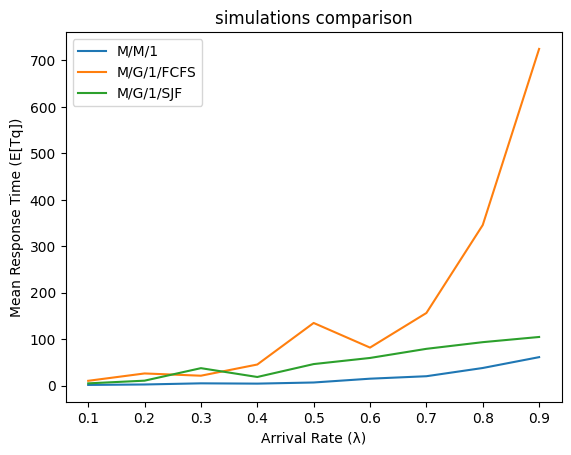

In [ ]:
# 1. Code for M/M/1 Queue

import numpy as np
import matplotlib.pyplot as plt
import queue


# a class that represents a job
class job:
  def __init__(self,time_entered,process_time):
    # time it enters the system
    self.time_entered = time_entered
    # time it takes to be processed
    self.process_time = process_time

def poisson_arrival_times(total_rounds,lamda):
  arrival_intervals = np.random.exponential(scale=(1/lamda),size=total_rounds)
  arrival_times = [arrival_intervals[0]]
  for i in range(1, len(arrival_intervals)):
    arrival_times.append(arrival_intervals[i] + arrival_times[i - 1])
  return arrival_times

# max percentage is set to 1
max_percentage=1
# with step 0.1
step=0.1

total_rounds=10000
mu=1/5

# store the simulation results
results1=[]

# loop to get the results
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  arrivals=poisson_arrival_times(total_rounds,lamda)
  arrival_time=arrivals.pop(0)

  job_waiting_list=[]
  server_busy=False # flag to track the server's status
  current_job=None

  total_waitime=0
  number_of_entered_jobs=0

  current_job_finish_time=-1

  #simulate arrival proccess
  for cur_time in range(0,total_rounds):

    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1

    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True


    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        # update num of jobs entered
        number_of_entered_jobs=number_of_entered_jobs+1
        # update total wait time
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True

    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        job_waiting_list.append(job(0,np.random.exponential(scale=int(1/mu))))

  # get final results
  results1.append(total_waitime/number_of_entered_jobs)


# 2. Code for M/G/1 FCFS Queue

#Tq results will be saved here
results2=[]

#for rho in 0.1:0.9
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  #get job arrival times
  arrivals=poisson_arrival_times(total_rounds,lamda)
  #get first job arrival time
  arrival_time=arrivals.pop(0)

  #represents the queue
  job_waiting_list=[]
  server_busy=False
  #pointer to current job
  current_job=None
  #data for final statistics
  total_waitime=0
  number_of_entered_jobs=0
  #flag that is -1 when there is no job in the queue
  current_job_finish_time=-1
  #simulate arrival proccess
  for cur_time in range(0,total_rounds):
    #wait time counter for jobs waiting
    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1
    #check if there is a job finished
    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        #if no other job waiting set server to not busy
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          #take next job
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True

    #check if a job came and put it to the server
    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        number_of_entered_jobs=number_of_entered_jobs+1
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True
    #adds jobs to the queue when they arrive
    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        #creates a 1 sec job with probability 98% and a 201 job with probability 2%
        job_time=-1
        job_type=np.random.rand()
        if (job_type>0.02):
          job_time=1
        else:
          job_time=201
        job_waiting_list.append(job(0,job_time))

   # get final results
  results2.append(total_waitime/number_of_entered_jobs)


#Tq results will be saved here
results3=[]

#for rho in 0.1:0.9
for rho in np.arange(0.1, max_percentage, step):

  lamda=rho*mu #jobs/sec

  #get job arrival times
  arrivals=poisson_arrival_times(total_rounds,lamda)
  #get first job arrival time
  arrival_time=arrivals.pop(0)

  #represents the queue
  job_waiting_list=[]
  server_busy=False
  #pointer to current job
  current_job=None
  #data for final statistics
  total_waitime=0
  number_of_entered_jobs=0
  #flag that is -1 when there is no job in the queue
  current_job_finish_time=-1
  #simulate arrival proccess
  for cur_time in range(0,total_rounds):
    #wait time counter for jobs waiting
    for job_waiting in job_waiting_list:
      job_waiting.time_entered+=1
    #check if there is a job finished
    if current_job_finish_time!=-1:
      if(cur_time>current_job_finish_time):
        #if no other job waiting set server to not busy
        if(len(job_waiting_list)<=0):
          server_busy=False
          current_job_finish_time=-1
        else:
          #take next job
          current_job=job_waiting_list.pop(0)
          number_of_entered_jobs=number_of_entered_jobs+1

          total_waitime=total_waitime+current_job.time_entered
          current_job_finish_time=current_job.process_time+cur_time
          server_busy=True

    #check if a job came and put it to the server
    if server_busy==False:
      if(len(job_waiting_list)>0):
        current_job=job_waiting_list.pop(0)
        number_of_entered_jobs=number_of_entered_jobs+1
        total_waitime=total_waitime+current_job.time_entered
        current_job_finish_time=current_job.process_time+cur_time
        server_busy=True
    #adds jobs to the queue when they arrive
    if(cur_time>arrival_time):
      if(len(arrivals)>0):
        arrival_time=arrivals.pop(0)
        #creates a 1 sec job with probability 98% and a 201 job with probability 2%
        #put shortest job first and logest one last
        job_time=-1
        job_type=np.random.rand()
        if (job_type>0.02):
          job_time=1
          job_waiting_list.insert(0,job(0,job_time))
        else:
          job_time=201
          job_waiting_list.append(job(0,job_time))

  # get final results
  results3.append(total_waitime/number_of_entered_jobs)

plt.plot(list(np.arange(0.1, max_percentage, step)), results1, label='M/M/1')
plt.plot(list(np.arange(0.1, max_percentage, step)), results2, label='M/G/1/FCFS')
plt.plot(list(np.arange(0.1, max_percentage, step)), results3, label='M/G/1/SJF')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Mean Response Time (E[Tq])')
plt.legend()
plt.title('simulations comparison')
plt.show()
